#Data Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.pipeline import Pipeline
import pprint
pp = pprint.PrettyPrinter()

In [0]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/Drive/My Drive/Colab Notebooks/Project3/advertising.csv')

#Data Exploration

In [0]:
data

,Day,Social,Google Adwords,Youtube,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,14.0
197,198,177.0,9.3,6.4,14.8
198,199,283.6,42.0,66.2,25.5


In [0]:
data.dtypes

Day                 int64
Social            float64
Google Adwords    float64
Youtube           float64
Sales             float64
dtype: object

In [0]:
data.isnull().sum()

Day               0
Social            0
Google Adwords    0
Youtube           0
Sales             0
dtype: int64

In [0]:
data.corr()['Sales']

Day              -0.021306
Social            0.901208
Google Adwords    0.349631
Youtube           0.157960
Sales             1.000000
Name: Sales, dtype: float64

We would drop `Day` and `Youtube`, as the have a low correlation (<0.2) with `Sales`, however wie will keep both for now, due to the low amount of variables overall.

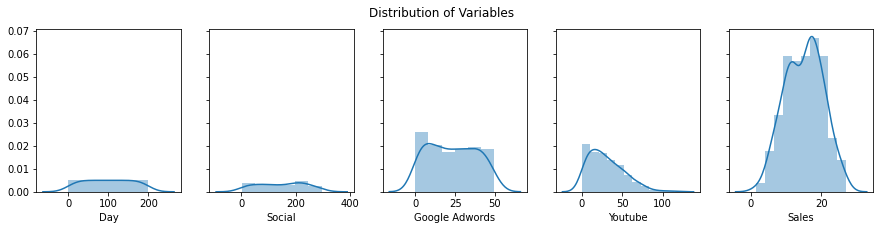

In [0]:
fig, axs = plt.subplots(1,5, figsize=(15,3),sharey=True)

for column, ax in zip(data.columns, axs.flatten()[:5]):
  sns.distplot(data[column],ax=ax)

plt.suptitle('Distribution of Variables')
plt.show()

In [0]:
for column in data.columns:
  print(f'{column}: {data[column].quantile(0.99)}, {data[column].max()}')

Day: 198.01, 200
Social: 292.9069999999999, 296.4
Google Adwords: 49.4, 49.6
Youtube: 89.5149999999999, 114.0
Sales: 25.506999999999994, 27.0


The only variable with moticable outliers is Youtube, but the difference between the 99th percentile and the max seems acceptable.

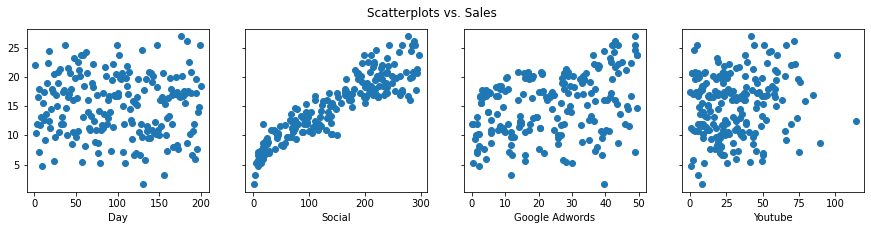

In [0]:
fig, axs = plt.subplots(1,4, figsize=(15,3),sharey=True)

for column, ax in zip(data.columns, axs.flatten()[:4]):
  ax.scatter(data[column],data['Sales'])
  ax.set_xlabel(column)
plt.suptitle('Scatterplots vs. Sales')
plt.show()